# Image segmentation task.

Korobov K.S. 3/18/2023

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io, color, filters, feature, measure
import pyclesperanto_prototype as cle
from scipy import ndimage as ndi
from scipy import stats
import napari
import pandas as pd

In [22]:
img_original_1  = io.imread('./data/img_1.png', as_gray=True)
# Import mask as binary image
mask_1 = io.imread('./data/mask_1.png', as_gray=True)

img_original_2  = io.imread('./data/img_2.png', as_gray=True)
# Import mask as binary image
mask_2 = io.imread('./data/mask_2.png', as_gray=True)

In [23]:
print('Image 1 shape: ', img_original_1.shape)
print('Mask 1 shape: ', mask_1.shape)

print('Image 2 shape: ', img_original_2.shape)
print('Mask 2 shape: ', mask_2.shape)

Image 1 shape:  (1536, 2048)
Mask 1 shape:  (1536, 2048)
Image 2 shape:  (1536, 2048)
Mask 2 shape:  (1536, 2048)


In [24]:
pixel_length = 110 / (185**2+5**2)**0.5 # 10 um in 93 pixels
pixel_area = pixel_length**2

# Print 3 decimal places
print(f"Pixel length: {pixel_length:.3f} um")
print(f"Pixel area: {pixel_area:.3f} um^2")

Pixel length: 0.594 um
Pixel area: 0.353 um^2


In [29]:
def plot_img(images, titles, cmap_name="gray"):
    fig, ax = plt.subplots(1, 3, figsize=(8, 5))
    ax[0].set_title(titles[0])
    ax[0].imshow(images[0], cmap=cmap_name)
    ax[1].set_title(titles[1])
    ax[1].imshow(images[1], cmap=cmap_name)
    ax[2].set_title(titles[2])
    ax[2].imshow(images[2], cmap=cmap_name)

def plot_one_img(image, title, cmap_name="gray"):
    plt.figure(figsize=(8, 5))
    plt.title(title)
    plt.imshow(image, cmap=cmap_name)

def plot_one2one(imageOne, imageTwo, titleOne, titleTwo, cmap_name="gray"):
    fig, ax = plt.subplots(1, 2, figsize=(8, 5))
    # Turn off tick labels
    ax[0].set_title(titleOne)
    ax[0].imshow(imageOne, cmap=cmap_name)
    ax[1].set_title(titleTwo)
    ax[1].imshow(imageTwo, cmap=cmap_name)
    plt.tight_layout()

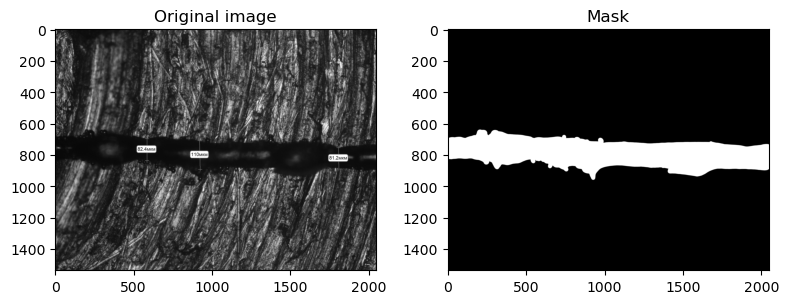

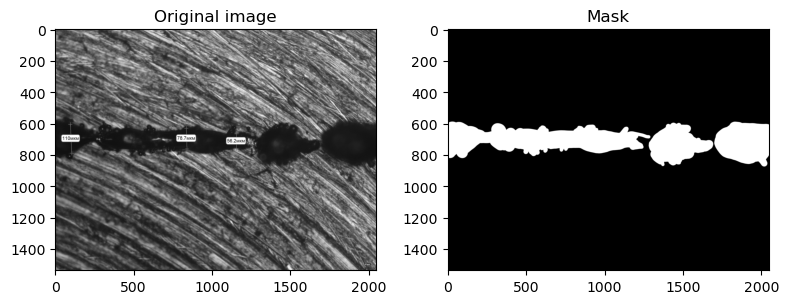

In [30]:
plot_one2one(img_original_1, mask_1, "Original image", "Mask")
plot_one2one(img_original_2, mask_2, "Original image", "Mask")

In [31]:
mask_labels_1 = measure.label(mask_1)
mask_labels_2 = measure.label(mask_2)

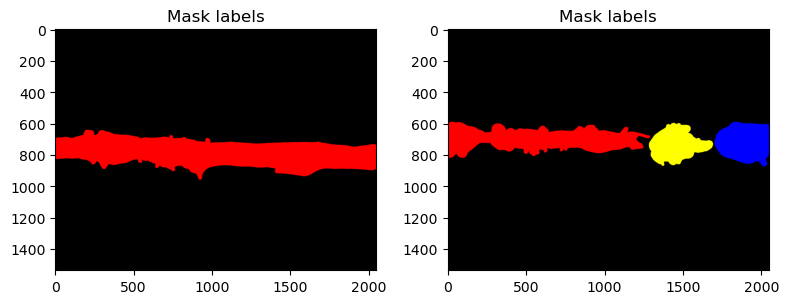

In [32]:
plot_one2one(color.label2rgb(mask_labels_1), color.label2rgb(mask_labels_2), "Mask labels", "Mask labels")

In [44]:
props_table_1 = pd.DataFrame(measure.regionprops_table(\
    mask_labels_1, properties=('label','area', 'eccentricity', 'centroid', 'bbox')))
# Rename centroid-0 and centroid-1 to x and y
props_table_1.rename(columns={'centroid-0': 'y', 'centroid-1': 'x'}, inplace=True)

props_table_2 = pd.DataFrame(measure.regionprops_table(\
    mask_labels_2, properties=('label','area', 'eccentricity', 'centroid', 'bbox')))
# Rename centroid-0 and centroid-1 to x and y
props_table_2.rename(columns={'centroid-0': 'y', 'centroid-1': 'x'}, inplace=True)

In [45]:
props_table_1

,label,area,eccentricity,y,x,bbox-0,bbox-1,bbox-2,bbox-3
0,1,355519,0.995745,793.470262,1016.530517,642,0,960,2048


In [46]:
props_table_2

,label,area,eccentricity,y,x,bbox-0,bbox-1,bbox-2,bbox-3
0,1,171698,0.992132,703.075586,579.097759,591,0,822,1287
1,2,77851,0.681400,723.615304,1887.337465,592,1695,876,2048
2,3,68083,0.752162,737.411836,1452.089993,598,1277,873,1686


In [47]:
def cons_check(labels):
    if len(labels) == 1:
        print('Track is consistent')
    else:
        print('Track is inconsistent')

In [54]:
# Convert all pixel values to um
def pix2um(props_table):
    props_table['area'] = props_table['area'] * pixel_area
    props_table['x'] = props_table['x'] * pixel_length
    props_table['y'] = props_table['y'] * pixel_length
    props_table['bbox-0'] = props_table['bbox-0'] * pixel_length
    props_table['bbox-1'] = props_table['bbox-1'] * pixel_length
    props_table['bbox-2'] = props_table['bbox-2'] * pixel_length
    props_table['bbox-3'] = props_table['bbox-3'] * pixel_length
    return props_table

In [55]:
pix2um(props_table_1)
pix2um(props_table_2)

,label,area,eccentricity,y,x,bbox-0,bbox-1,bbox-2,bbox-3
0,1,21429.637534,0.992132,248.385828,204.586362,351.277132,0.000000,488.578346,764.963906
1,2,9716.587914,0.681400,255.642195,666.767396,351.871509,1007.469947,520.674733,1217.285222
2,3,8497.443256,0.752162,260.516298,513.001136,355.437775,759.020131,518.891601,1002.120549


In [48]:
cons_check(props_table_1['label'])
cons_check(props_table_2['label'])

Track is consistent
Track is inconsistent


In [57]:
# Export to csv
props_table_1.to_csv('./props_table_1.csv')
props_table_2.to_csv('./props_table_2.csv')